In [2]:
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.1.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached namex-0.0.7-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------

In [3]:
pip show tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install mediapipe


   ---------------------------------------- 0.0/50.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/50.8 MB 3.2 MB/s eta 0:00:16
   ---------------------------------------- 0.5/50.8 MB 5.9 MB/s eta 0:00:09
    --------------------------------------- 0.9/50.8 MB 7.3 MB/s eta 0:00:07
    --------------------------------------- 1.2/50.8 MB 8.5 MB/s eta 0:00:06
    --------------------------------------- 1.2/50.8 MB 8.5 MB/s eta 0:00:06
    --------------------------------------- 1.2/50.8 MB 8.5 MB/s eta 0:00:06
    --------------------------------------- 1.2/50.8 MB 8.5 MB/s eta 0:00:06
    --------------------------------------- 1.2/50.8 MB 8.5 MB/s eta 0:00:06
    --------------------------------------- 1.2/50.8 MB 8.5 MB/s eta 0:00:06
    --------------------------------------- 1.2/50.8 MB 8.5 MB/s eta 0:00:06
    --------------------------------------- 1.2/50.8 MB 8.5 MB/s eta 0:00:06
    --------------------------------------- 1.2/50.8 MB 8.5 MB/s eta 0:00:06
    --

In [5]:
pip show mediapipe

Name: mediapipe
Version: 0.10.11
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: absl-py, attrs, flatbuffers, jax, matplotlib, numpy, opencv-contrib-python, protobuf, sounddevice
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install opencv-python


  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip show opencv-python

Name: opencv-python
Version: 4.9.0.80
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: numpy, numpy, numpy, numpy, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn


In [3]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip show matplotlib

Name: matplotlib
Version: 3.8.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: C:\Users\user\anaconda3\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: mediapipe, seaborn
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Color conversion from BGR to RGB
    image.flags.writeable = False                  #Image is set to non-writeable
    results = model.process(image)                 #Make prediction
    image.flags.writeable = True                   #Image is set to writeable
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Color conversion from RGB to BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)) 


In [5]:
cap = cv2.VideoCapture(0)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        #read feed
        ret, frame = cap.read()
    
        #Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #Show keypoints
        draw_landmarks(image, results)
        
        #show to screen
        cv2.imshow('OpenCV feed', image)
        
        #break grecefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
len(results.face_landmarks.landmark)

468

In [9]:
draw_landmarks(frame, results)

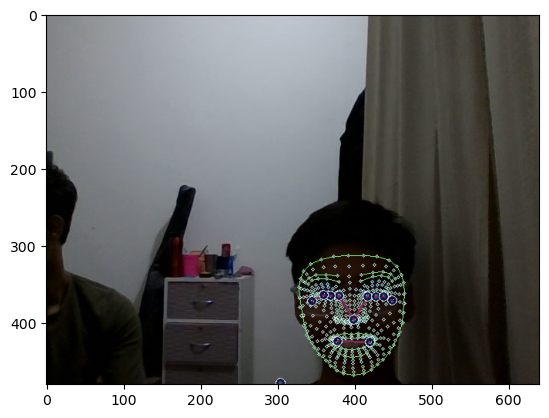

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [23]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [6]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [83]:
lh.shape

(63,)

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh]) 

In [91]:
extract_keypoints(results).shape

(1662,)

In [7]:
result_test = extract_keypoints(results)

In [8]:
result_test

array([0., 0., 0., ..., 0., 0., 0.])

In [8]:
np.save('0', result_test)

In [9]:
np.load('0.npy')

array([ 0.56304795,  0.75599617, -1.18668377, ...,  0.        ,
        0.        ,  0.        ])

In [8]:
#Path to export data, numpy array
DATA_PATH = os.path.join('MP_Data')

#Actions to detect
actions = np.array(['Hello', 'Goodbye', 'Yes', 'No', 'Thankyou', 'ILoveYou'])

#30 videos worth of data
no_sequence = 30

#30 frames per videos in length
sequence_length = 30

In [9]:
for action in actions: 
    for sequence in range(no_sequence):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [60]:
cap = cv2.VideoCapture(0)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    #New loop
    #loop through actions
    for action in actions:
        #Loop through sequence aka videos 
        for sequence in range(no_sequence):
            #Loop through sequence length aka video length
            for frame_num in range(sequence_length):
        
                #read feed
                ret, frame = cap.read()
            
                #Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)
        
                #Show keypoints
                draw_landmarks(image, results)

                #New Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 4, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 4, cv2.LINE_AA)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                    
                
                #show to screen
                cv2.imshow('OpenCV feed', image)
        
                #break grecefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [10]:
from sklearn.model_selection import train_test_split  #split dataset into training and testing
from tensorflow.keras.utils import to_categorical     #converts categorical variables into a binary matrix representation

In [11]:
label_map = {label:num for num, label in enumerate(actions)}

In [63]:
label_map

{'Hello': 0, 'Goodbye': 1, 'Yes': 2, 'No': 3, 'Thankyou': 4, 'ILoveYou': 5}

In [12]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequence):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
            

In [15]:
np.array(sequences).shape

(180, 30, 1662)

In [16]:
np.array(labels).shape

(180,)

In [13]:
X = np.array(sequences)

In [30]:
X.shape

(180, 30, 1662)

In [14]:
Y = to_categorical(labels).astype(int)

In [33]:
Y.shape

(180, 6)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [116]:
Y_train.shape

(153, 6)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

In [17]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [18]:
# Define the model
model = Sequential()

# Add the LSTM layers
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Add the Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
res = [0.4, 0.1, 0.9]

In [72]:
actions[np.argmax(res)]

'Yes'

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [20]:
model.fit(X_train, Y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - categorical_accuracy: 0.1453 - loss: 1.8056
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1353 - loss: 1.7915
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1544 - loss: 1.7867
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1548 - loss: 1.7797
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2568 - loss: 1.7700
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1645 - loss: 1.7530
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2157 - loss: 1.6756
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.3545 - loss: 1.6359
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2169 - loss: 1.5971
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.3372 - loss: 1.5889
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,324 (6.83 MB)

 Trainable params: 596,774 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,550 (4.55 MB)

In [22]:
res = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 365ms/step


In [23]:
actions[np.argmax(res[0])]

'Hello'

In [24]:
actions[np.argmax(Y_test[0])]

'Hello'

In [25]:
model.save('action.h5')

In [26]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [27]:
yhat = model.predict(X_train)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [28]:
ytrue = np.argmax(Y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [29]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[119,   0],
        [  0,  25]],

       [[117,   1],
        [  3,  23]],

       [[115,   3],
        [  0,  26]],

       [[119,   0],
        [  0,  25]],

       [[124,   0],
        [  0,  20]],

       [[122,   0],
        [  1,  21]]], dtype=int64)

In [59]:
accuracy_score(ytrue, yhat)

1.0

In [60]:
yhat = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [19]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.2

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]
#        sequence.append(keypoints)
#        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [205]:
np.expand_dims(X_test[0], axis=0)

array([[[ 0.48839268,  0.41154924, -0.86162746, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.43954301,  0.41164145, -0.8712858 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.42854756,  0.41166505, -0.94189131, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.4117187 ,  0.41739407, -0.86032116, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.41183442,  0.4176777 , -0.86092538, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.41192666,  0.41820616, -0.87054455, ...,  0.        ,
          0.        ,  0.        ]]])

In [40]:
 res[np.argmax(res)]

0.20348747